# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'dataset/train.p'
testing_file = 'dataset/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
import numpy as np
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.bincount(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

print(X_train.shape)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
(39209, 32, 32, 3)


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

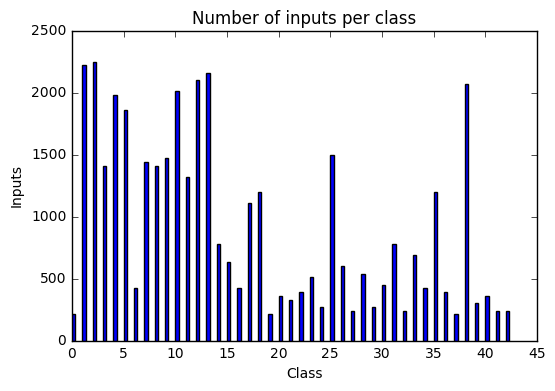

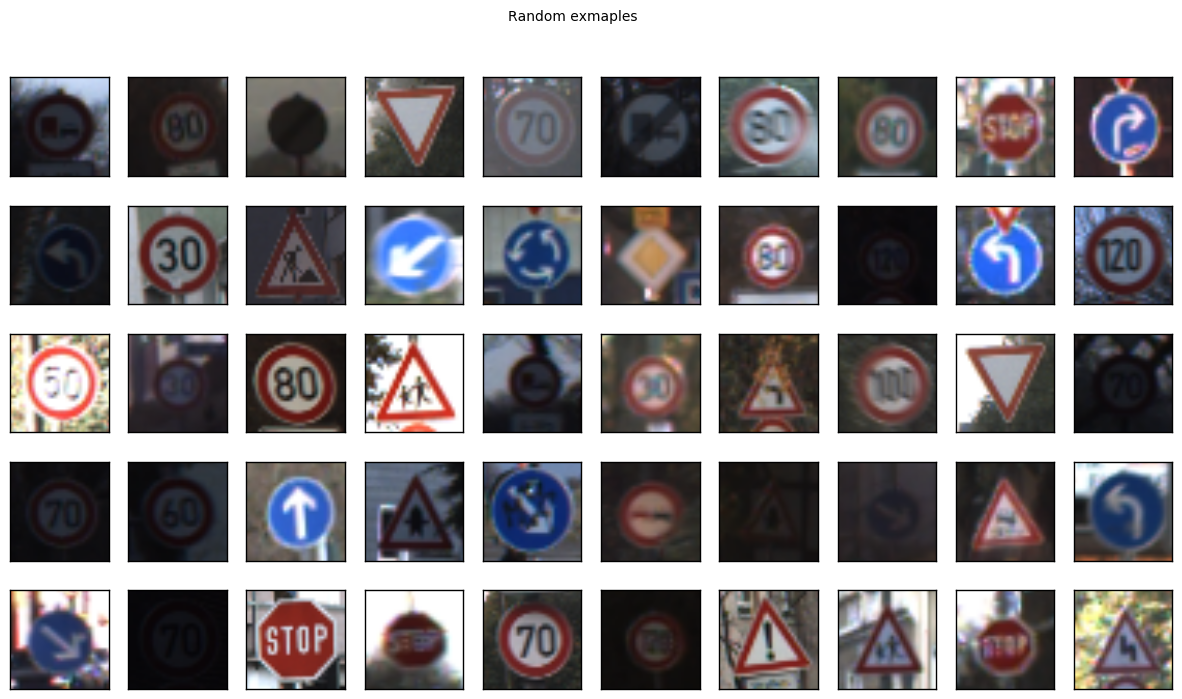

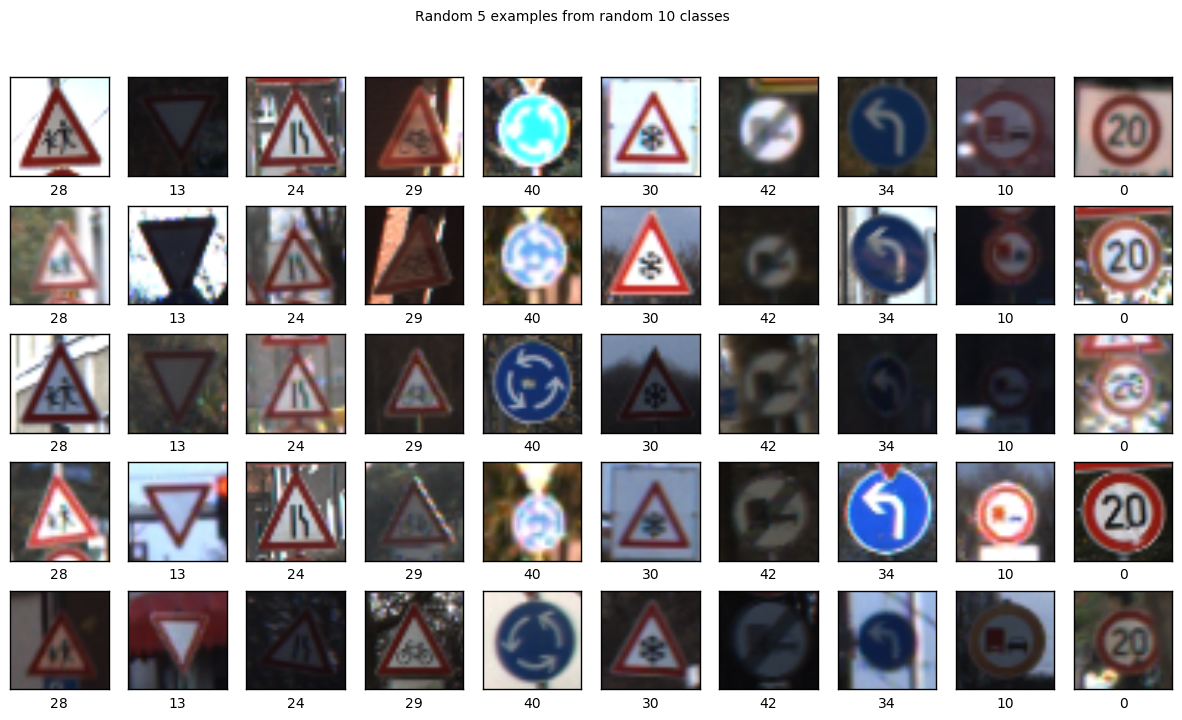

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt
%matplotlib inline

classes, cnt = np.unique(y_train, return_counts=True)

# ************************ number of inputs per class ******************************

inputs_per_class = np.bincount(y_train)
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylabel('Inputs')
ax.set_xlabel('Class')
ax.set_title('Number of inputs per class')
ax.bar(range(len(inputs_per_class)), inputs_per_class, 1/3, color='blue', label='Inputs per class')
plt.show()

# ********************* show some random examples **************************************

fig = plt.figure(figsize=(15,8))
fig.suptitle('Random exmaples')
idxs = list(range(n_train))
np.random.shuffle(idxs)
cols = 10
rows = 5
for i in range(rows):
    for j in range(cols):
        ax = plt.subplot(rows, cols, cols * i + j + 1)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(X_train[idxs[cols * i + j]])
plt.show()

# ******************** show k random examples from each class **************************

# number of samples to show per label
top_k = 5

# number of labels/classes to display
disp_n_classes = 10

fig, axes = plt.subplots(top_k, disp_n_classes,figsize=(15,8))
fig.suptitle('Random %d examples from random %d classes' % (top_k, disp_n_classes))
             
cls_idxs = list(range(classes.shape[0]))      
np.random.shuffle(cls_idxs)

for col, idx in enumerate(cls_idxs[:disp_n_classes]):
    cls = classes[idx]         
    imgs = X_train[y_train == cls]
    np.random.shuffle(imgs)    
    imgs = imgs[:top_k]
    
    for row in range(imgs.shape[0]):
        ax = axes[row][col]
        # Show the class as the label on the x-axis.
        ax.set_xlabel(cls)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
        # show image
        ax.imshow(imgs[row])
plt.show()    

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

import cv2
 
def preprocess(X):
    X_norm = np.zeros(X.shape, dtype=np.float32)
    for i in range(X_norm.shape[0]):
        X_norm[i] = equalize_and_normalise(X[i])
    return X_norm

def normalize(image):
    dest=np.empty(image.shape,dtype=np.float32)
    cv2.normalize(image, dest, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return dest

def equalize_and_normalise(image):
       yuv=cv2.split(cv2.cvtColor(image, cv2.COLOR_RGB2YUV))
       yuv[0]=cv2.equalizeHist(yuv[0])

       norm=normalize(cv2.cvtColor(cv2.merge(yuv), cv2.COLOR_YUV2RGB))

       return norm

In [5]:
X_train_prep = preprocess(X_train)
X_test_prep = preprocess(X_test)

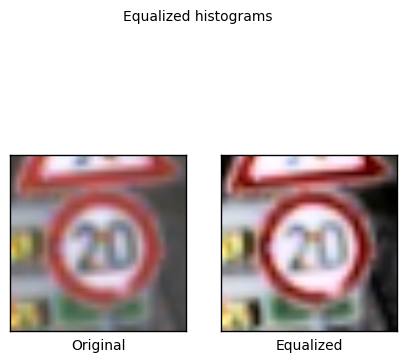

In [7]:
# draw one example
img_org = X_train[5]
img_preproc = equalize_and_normalise(img_org)

# plot original
fig = plt.figure(figsize=(5, 5))
fig.suptitle('Equalized histograms')
ax = plt.subplot(1, 2, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Original")

# plot equalized
ax.imshow(np.squeeze(img_org), cmap='gray')
ax = plt.subplot(1, 2, 2)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Equalized")
ax.imshow(np.squeeze(img_preproc), cmap='gray')
    
plt.show()

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

First approach was popular grayscalling but I found that it caused quite low accuracy. I decided to convert an image to YUV color space, perform histogram normalization and convert back to RGB. All channels have been used so as to not to lose information. Moreover, all pixes have been normalized to the range (0,1).
1. luminance component (Y) normalization normalizes the brightness of the image. To extract luminance component I converted the image to YUV colorspace and after normalization converted back to RGB. Some images are very dark so this technique helps.
2. Pixels normalization helps with faster convergence during gradient descent because broad range of feature values is reduced to (0,1). Gradient descent doesn't have to "jump around" as much.


In [8]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

def jitter(img, ang_range=20, shear_range=10, trans_range=5):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over.

    A Random uniform distribution is used to generate different parameters for transformation
    '''
    # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    if len(img.shape) == 3:
        rows,cols,ch = img.shape
    else:
        rows,cols = img.shape
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    #img = np.expand_dims(img, axis=4)

    return img

def augment_data(images, labels, ang_range=20, shear_range=10, trans_range=5):
    
    inputs_per_class = np.bincount(labels)
    max_inputs = np.max(inputs_per_class)
    input_ratio = np.zeros(inputs_per_class.shape, np.int32)
    
    augmented_images = []
    augmented_labels = []
        
    for i in range(len(inputs_per_class)):
        input_ratio[i] = int(max_inputs / inputs_per_class[i]) - 1

        if input_ratio[i] < 1:
            continue
            
        mask = np.where(labels == i)    

        for img in images[mask]:
            for j in range(input_ratio[i]):    
                augmented_images.append(jitter(img,  ang_range, shear_range, trans_range))
                augmented_labels.append(i)        

    print ("Inputs per class=", inputs_per_class)
    print ("Max inputs=", max_inputs)
    print ("Input ratios per class=", input_ratio)
    
    return np.asarray(augmented_images), np.asarray(augmented_labels)


In [9]:
# augment data
new_augmented_images, new_augmented_labels = augment_data(X_train_prep, y_train, ang_range=10, shear_range=10)
X_train_aug = np.concatenate((X_train_prep, new_augmented_images))
y_train_aug = np.concatenate((y_train, new_augmented_labels))


# split data
from sklearn.utils import shuffle

X_train_sh, y_train_sh = shuffle(X_train_aug, y_train_aug)
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
   X_train_sh,
   y_train_sh,
   test_size=0.2,
   random_state=832289
)
n_train = X_train.shape[0]
n_valid = X_valid.shape[0]

Inputs per class= [ 210 2220 2250 1410 1980 1860  420 1440 1410 1470 2010 1320 2100 2160  780
  630  420 1110 1200  210  360  330  390  510  270 1500  600  240  540  270
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Max inputs= 2250
Input ratios per class= [9 0 0 0 0 0 4 0 0 0 0 0 0 0 1 2 4 1 0 9 5 5 4 3 7 0 2 8 3 7 4 1 8 2 4 0 4
 9 0 6 5 8 8]


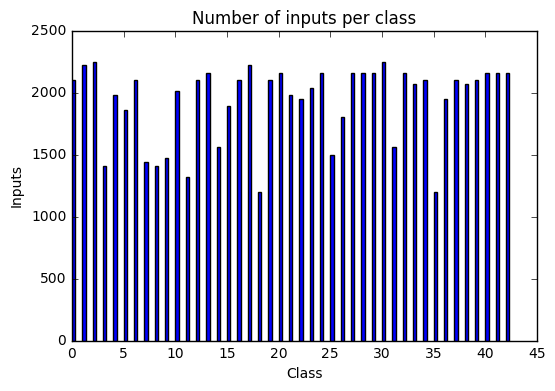

In [10]:
inputs_per_class = np.bincount(y_train_aug)
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_ylabel('Inputs')
ax.set_xlabel('Class')
ax.set_title('Number of inputs per class')
ax.bar(range(len(inputs_per_class)), inputs_per_class, 1/3, color='blue', label='Inputs per class')
plt.show()

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

Some classes are quite underrepresented in the training set so I decided to generate additional images only for those classes. As depicted on the previous plot, examples are quite evenly disributed troughout all classes. I used Vivek's routine to augment data with translations, rotations but decided to limit ranges for rotation, sheer. Such augmentation helped to get additional 3% accuracy.

I decided to split data 20% validation set and 80% training set. I used helper function train_test_split from sklearn package. This function performs random sampling. I didn't change test set. Validation set is used to measure accuracy after every epoch. After training the test set is used only once to measure performance on unseen data.

In [11]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

def get_weights(name, shape):
    with tf.variable_scope("scope1") as scope:
        n = name + "w"
        try:
            v = tf.get_variable(n, shape=shape,
                    initializer=tf.contrib.layers.xavier_initializer())
        except ValueError:
            scope.reuse_variables()
            v = tf.get_variable(n)
        return v

def get_biases(name, length):
    with tf.variable_scope("scope1") as scope:
        n = name + "b"
        try:
            v = tf.get_variable(n, shape=[length],
                    initializer=tf.contrib.layers.xavier_initializer())
        except ValueError:
            scope.reuse_variables()
            v = tf.get_variable(n)
        return v

def new_conv_layer(name,               # Name
                   input,              # The previous layer.
                   num_input_channels, # Num. channels in prev. layer.
                   filter_size,        # Width and height of each filter.
                   num_filters,        # Number of filters.
                   use_pooling=True):  # Use 2x2 max-pooling.

    shape = [filter_size, filter_size, num_input_channels, num_filters]
    
    weights = get_weights(name, shape=shape)
    biases = get_biases(name, length=num_filters)

    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    layer = tf.nn.bias_add(layer, biases)

    if use_pooling:
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')
    layer = tf.nn.relu(layer)

    return layer, weights

def flatten_layer(layer):
    layer_shape = layer.get_shape()
    num_features = layer_shape[1:4].num_elements()
    layer_flat = tf.reshape(layer, [-1, num_features])

    return layer_flat, num_features

def new_fc_layer(name,           # Name
                 input,          # The previous layer.
                 num_inputs,     # Num. inputs from prev. layer.
                 num_outputs,    # Num. outputs.
                 use_relu=True): # Use Rectified Linear Unit (ReLU)?

    weights = get_weights(name, shape=[num_inputs, num_outputs])
    biases = get_biases(name, length=num_outputs)

    layer = tf.add(tf.matmul(input, weights), biases)

    if use_relu:
        layer = tf.nn.relu(layer)

    return layer

In [12]:
# Convolutional Layer 1.
filter_size1 = 5
num_filters1 = 32

# Convolutional Layer 2.
filter_size2 = 5
num_filters2 = 64

# Convolutional Layer 3.
filter_size3 = 5
num_filters3 = 128

# Fully-connected layer1.
fc_size1 = 512

img_size = 32
img_size_flat = img_size * img_size
img_shape = (img_size, img_size)
num_channels = 3

x = tf.placeholder(tf.float32, shape=[None, img_size, img_size, num_channels], name='x')
y = tf.placeholder(tf.int32, (None), name='y')
one_hot_y = tf.one_hot(y, n_classes)

layer_conv1, weights_conv1 = \
    new_conv_layer("conv1", input=x,
                   num_input_channels=num_channels,
                   filter_size=filter_size1,
                   num_filters=num_filters1,
                   use_pooling=True)

layer_conv2, weights_conv2 = \
    new_conv_layer("conv2", input=layer_conv1,
                   num_input_channels=num_filters1,
                   filter_size=filter_size2,
                   num_filters=num_filters2,
                   use_pooling=True)

layer_conv3, weights_conv3 = \
    new_conv_layer("conv3", input=layer_conv2,
                   num_input_channels=num_filters2,
                   filter_size=filter_size3,
                   num_filters=num_filters3,
                   use_pooling=True)

layer_flat, num_features = flatten_layer(layer_conv3)

layer_fc1 = new_fc_layer("fc1", input=layer_flat,
                         num_inputs=num_features,
                         num_outputs=fc_size1,
                         use_relu=True)

logits = new_fc_layer("out", input=layer_fc1,
                         num_inputs=fc_size1,
                         num_outputs=n_classes,
                         use_relu=False)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
Architecture is based on CNN, composed of 3 convolution layers and 2 fully connected layers. After trying feeding just one channel and Lenet architecture I decided to increase number of filters and use all 3 channels. Also I decided to use initialization using xavier_initializer. All that gave me quite good results. Architecture is rather simple:

1. conv layer 5x5x32, 
2. max_pool 2x2 
3. relu
4. conv layer 5x5x64
5. max_pool 2x2 
6. relu
7. conv layer 5x5x128
8. max_pool 2x2 
9. relu
10. fully conn layer 512 
11. relu
12. fully conn layer 43 (number of classes)

I used convinient routines to create layers from Hvaas tutorial. Of course further improvement can be obtained by using dropout and regularization.


In [13]:
### Train your model here.
### Feel free to use as many code cells as needed.

def evaluate(X_data, y_data, batch_size):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [14]:
rate = 0.001
batch_size = 256
epochs = 150

# pipeline
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=rate)
training = optimizer.minimize(loss)

# eval
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())

    import time
    start = time.time()

    for i in range(epochs):
        X_train, y_train = shuffle(X_train, y_train)

        for offset in range(0, n_train, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training, feed_dict={x: batch_x, y: batch_y})

        validation_accuracy = evaluate(X_valid, y_valid, batch_size)
        print("EPOCH {} ...".format(i + 1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    end = time.time()
    hours, rem = divmod(end - start, 3600)
    minutes, seconds = divmod(rem, 60)

    # Display amount of time for training
    print("\n")
    print("Optimization finished in:")
    print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours), int(minutes), seconds))
    print("\n")

    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'traffic_signs_model.ckpt')
    print("Model saved")
    
    test_accuracy = evaluate(X_test, y_test, batch_size)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


EPOCH 1 ...
Validation Accuracy = 0.720

EPOCH 2 ...
Validation Accuracy = 0.857

EPOCH 3 ...
Validation Accuracy = 0.914

EPOCH 4 ...
Validation Accuracy = 0.942

EPOCH 5 ...
Validation Accuracy = 0.948

EPOCH 6 ...
Validation Accuracy = 0.943

EPOCH 7 ...
Validation Accuracy = 0.954

EPOCH 8 ...
Validation Accuracy = 0.955

EPOCH 9 ...
Validation Accuracy = 0.965

EPOCH 10 ...
Validation Accuracy = 0.956

EPOCH 11 ...
Validation Accuracy = 0.970

EPOCH 12 ...
Validation Accuracy = 0.960

EPOCH 13 ...
Validation Accuracy = 0.964

EPOCH 14 ...
Validation Accuracy = 0.967

EPOCH 15 ...
Validation Accuracy = 0.963

EPOCH 16 ...
Validation Accuracy = 0.959

EPOCH 17 ...
Validation Accuracy = 0.968

EPOCH 18 ...
Validation Accuracy = 0.961

EPOCH 19 ...
Validation Accuracy = 0.971

EPOCH 20 ...
Validation Accuracy = 0.973

EPOCH 21 ...
Validation Accuracy = 0.958

EPOCH 22 ...
Validation Accuracy = 0.974

EPOCH 23 ...
Validation Accuracy = 0.967

EPOCH 24 ...
Validation Accuracy = 0.976

E

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
Adam optimizer with learning rate 0.001,
batch size 256,
epochs 150 (it started overfitting - 100 would be enough)

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I started with simple CNN Lenet architecture, grayscaled images, random batch, small batch size. I eperimented a little with weight/bias initialization params (std) and learning rate. I tried to modify one parameter at a time. I tried many techniques of preprocesing sugested by excelent CarND forum. Investigated a few techniques of fetching a batch - random, circular, shuffled etc. I almost abandon augmentation as it didn't improve accurracy first time but later on I found that some classes are realy underrepresented so it may be good approach to generate additional data for those classes.


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

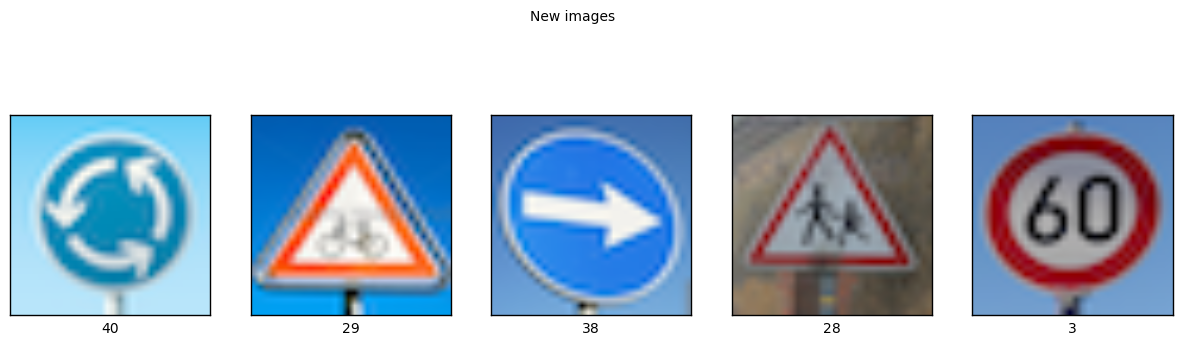

In [15]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os

new_images_files = ["Roundabout-resized.png", "BicycleCrossing-resized.png", "ToTheRight-resized.png", "ChildrenCrossing-resized.png", "60kmh-resized.png"]
new_labels = [40, 29, 38, 28, 3]

new_images = []

fig = plt.figure(figsize=(15,8))
fig.suptitle('New images')

for i, imgname in enumerate(new_images_files):
    image = cv2.imread('test_imgs/' + imgname)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    new_images.append(image)
    ax = plt.subplot(2, 5, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(new_labels[i])
    ax.imshow(image)
    
plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
I suspect that classes 28,29 may be quite difficult to properly classify because of very subtle shapes inside. Those features are even harder to recognize when the image is blurred or skewed. 

In [16]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

X_new_images = preprocess(np.array(new_images))

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    new_saver = tf.train.import_meta_graph('traffic_signs_model.ckpt.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))
    acc = sess.run(accuracy_operation, feed_dict={x: X_new_images, y: new_labels})
    print("Accuracy on new data:", acc)
    

Accuracy on new data: 0.6


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

Model correctly classified 3 out of 5 new images (accuracy 60 %). As I suspected only signs with fine complex shapes inside have been misclassified. The performance for those new signs is rather poor 60% versus 89% model accuracy on test dataset.

probabilities:
[[  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   1.22566998e-22   2.61922469e-24   2.85194452e-36
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   6.64352293e-15   7.91106935e-17   1.17097392e-17
    1.72464023e-20   4.02119638e-21   2.98539757e-26   2.36578261e-26
    2.84731582e-27   1.09384645e-27]
 [  1.00000000e+00   2.49204773e-23   1.68015461e-24   7.12015675e-28
    1.62178611e-30   1.94728776e-33   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]
class ids:
[[40  0  1  2  3  4  5  6  7  8]
 [29  0  1  2  3  4  5  6  7  8]
 [34 33 40 16  0  1  2

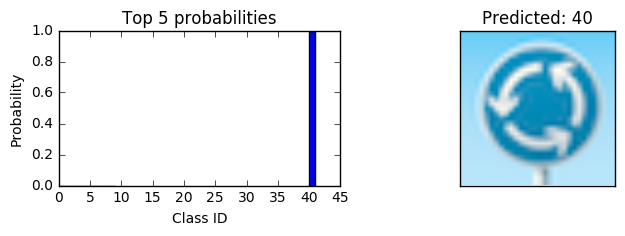

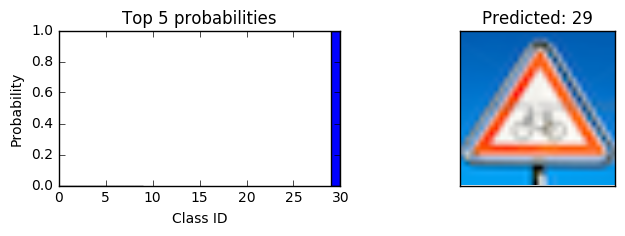

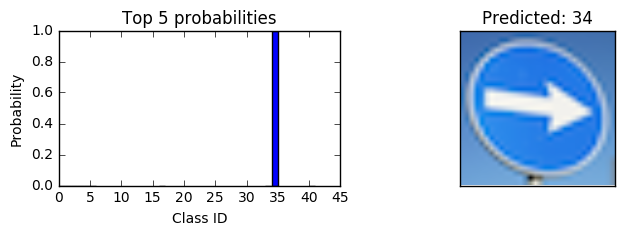

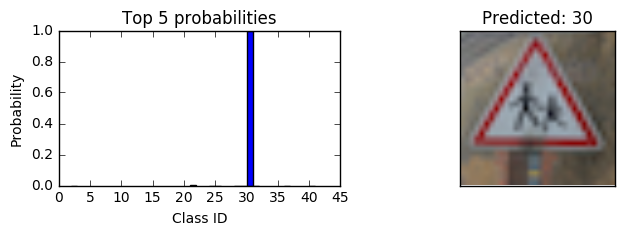

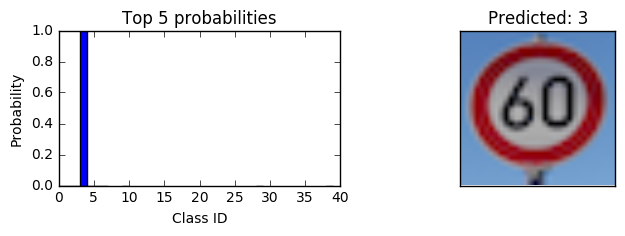

In [20]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

def plot_probability_per_class(probabilities, classes, image):   
    mpl_fig = plt.figure(figsize=(8,2))
    ax = mpl_fig.add_subplot(121)
    ax.set_ylabel('Probability')
    ax.set_xlabel('Class ID')
    ax.set_title('Top 5 probabilities')
    ax.bar(classes, probabilities, 1, color='blue', label='Inputs per class')
    
    top = probabilities.argmax()
    class_id = classes[top]
    
    ax = mpl_fig.add_subplot(122)
    ax.set_xticks([])
    ax.set_yticks([])
    title = "Predicted: %s" % class_id
    ax.set_title(title)
    ax.imshow(image)
    
    plt.show()


with tf.Session() as sess:     
    sess.run(tf.initialize_all_variables())
    new_saver = tf.train.import_meta_graph('traffic_signs_model.ckpt.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))

    new_softmax_predictions = tf.nn.softmax(logits)
    topFive = tf.nn.top_k(new_softmax_predictions, k=10, sorted=True, name=None)
    
    print("probabilities:")
    probabilities = topFive.values.eval({x: X_new_images}, session=sess)
    print(probabilities)
    
    print("class ids:")
    classes = topFive.indices.eval({x: X_new_images}, session=sess)
    print(classes)
    
    for p, c, i in zip(probabilities, classes, new_images):
        plot_probability_per_class(p, c, i)


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
Model is very certain of all results. Unfortunatelly in 2 cases model is wrong.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.